In [10]:
import pandas as pd
data = pd.read_csv("MINDsmall_dev/news.tsv", sep = '\t', header = None, names = ['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])

In [7]:
import os
from openai import AzureOpenAI
import numpy as np

client = AzureOpenAI(
    api_key = "79dcc6d1f09e4a2d9a6057c453471df4",
    api_version = "2024-02-01",
    azure_endpoint = "https://studybuddy.openai.azure.com/"
)

def get_embedding(text_list):
    def chunks(lst, n = 512):
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
    
    ret = []
    for chunk in chunks(text_list):
        response = client.embeddings.create(
            input = chunk,
            model = "text-embedding-3-large"
        )
        ret += [np.array(d.embedding) for d in response.data]
        print("processed chunk")
        
    return ret

    """
    response = client.embeddings.create(
        input = text,
        model = "text-embedding-3-large"
    )

    global i
    print(i)
    print(response.data)
    i += 1

    return np.array(response.data[0].embedding)
    """

In [8]:
data['title_embedding'] = get_embedding(list(data['title']))

AuthenticationError: Error code: 401 - {'statusCode': 401, 'message': 'Unauthorized. Access token is missing, invalid, audience is incorrect (https://cognitiveservices.azure.com), or have expired.'}

In [33]:
def clip(d):
    return str(d)[:512]

data['abstract_embedding'] = get_embedding([clip(d) for d in list(data['abstract'])])

processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processed chunk
processe

In [36]:
# make 'abstract_embedding' empty when 'abstract' is NaN
data.loc[data['abstract'].isnull(), 'abstract_embedding'] = None

In [9]:
data

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
42411,N63550,lifestyle,lifestyleroyals,Why Kate & Meghan Were on Different Balconies ...,There's no scandal here. It's all about the or...,https://assets.msn.com/labs/mind/BBWyynu.html,"[{""Label"": ""Meghan, Duchess of Sussex"", ""Type""...",[]
42412,N30345,entertainment,entertainment-celebrity,See the stars at the 2019 Baby2Baby gala,Stars like Chrissy Teigen and Kate Hudson supp...,https://assets.msn.com/labs/mind/BBWyz7N.html,[],"[{""Label"": ""Kate Hudson"", ""Type"": ""P"", ""Wikida..."
42413,N30135,news,newsgoodnews,Tennessee judge holds lawyer's baby as he swea...,Tennessee Court of Appeals Judge Richard Dinki...,https://assets.msn.com/labs/mind/BBWyzI8.html,"[{""Label"": ""Tennessee"", ""Type"": ""G"", ""Wikidata...","[{""Label"": ""Tennessee Court of Appeals"", ""Type..."
42414,N44276,autos,autossports,Best Sports Car Deals for October,NaN,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[]


In [39]:
# save to disk, with numpy arrays
data.to_pickle("news_embeddings.pkl")

In [3]:
# to load, use:
data = pd.read_pickle("news_embeddings.pkl")

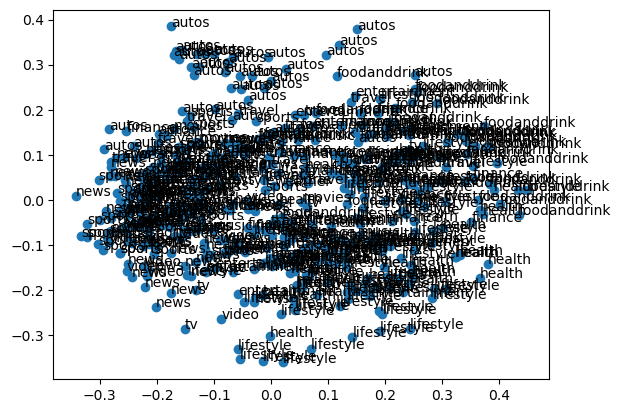

In [48]:
# plot the embeddings vs category
# add labels to the plot with category name
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = np.array(list(data['title_embedding'])[:500])
X = pca.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])

for i, txt in enumerate(list(data['category'])[:500]):
    ax.annotate(txt, (X[i, 0], X[i, 1]))
    
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Convert embeddings column into list of lists
data['title_embedding'] = data['title_embedding'].apply(lambda row: list(row))

# Perform Kmeans clustering
kmeans = KMeans(n_clusters=len(df['category'].unique()))
kmeans.fit(data['title_embedding'].tolist())
data['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['title_embedding'].map(lambda x: x[0]), 
                y=data['title_embedding'].map(lambda x: x[1]),
                hue='category', style='cluster', data=data)
plt.title('KMeans Clustering on title_embeddings')
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

: 